# Image Resizing using OpenCV

* In this Jupyter notebook let's try to resize the image using OpenCV Library 

In [11]:
#let's start with the Imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Read the Image 
* Read the image using **cv2.imread()** function 
* Display the image using **plt.imshow()** function 

* When **cv2.imread()** function reads am image the color scale is in **BGR** format so everytime we are displaying the image we will be converting it back to **RGB** format

In [12]:
import requests
url = "https://cdn.pixabay.com/photo/2012/05/29/00/43/car-49278_1280.jpg"
r = requests.get(url)
with open('image.jpg', 'wb') as f:
    f.write(r.content) 

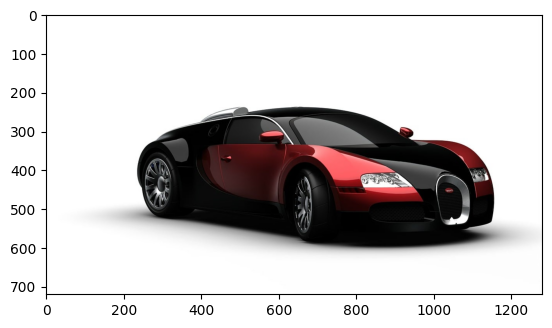

In [13]:
image= cv2.imread('image.jpg')
plt.imshow(image[:,:,::-1])

## Resize the Image (Make it small)
 * let's down size the image using new width and height

In [14]:
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)


## Mess up with the Aspect Ratio 
 * Change the Aspect ratio 

In [15]:
up_width = 600
up_height = 400
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)


Text(0.5, 1.0, 'Scaled Down Image')

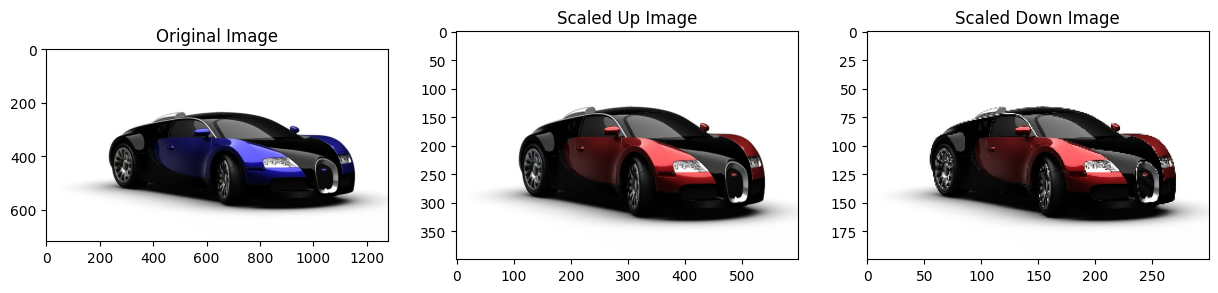

In [21]:
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::1]);plt.title("Original Image") # the -1 is to reverse the order of the channels
plt.subplot(132);plt.imshow(resized_up[:,:,::-1]);plt.title("Scaled Up Image") # the -1 is equivalent to call cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(133);plt.imshow(resized_down[:,:,::-1]);plt.title("Scaled Down Image")

# Specify the Scaling Factor 
 * Scale Down the image image by setting the scaling factor as **0.6**
 * Scale Up the image by setting the scaling factor as **1.5**

In [17]:
#scaling Up factor
scale_up_x = 1.2
scale_up_y = 1.2

#scaling Down factor 
scale_down = 0.5

scaled_f_down = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)


Text(0.5, 1.0, 'Scaled Up Image, size = (864, 1536)')

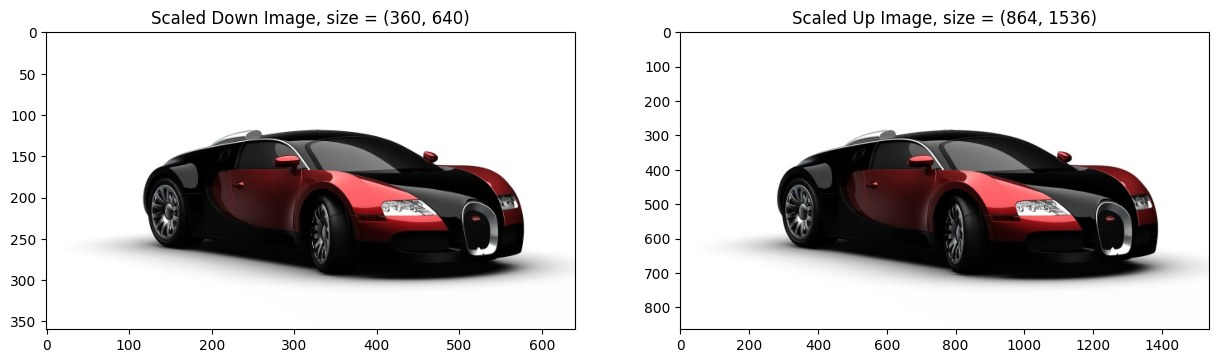

In [18]:
# We can also use the following syntax for displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaled_f_down[...,::-1])
plt.title("Scaled Down Image, size = {}".format(scaled_f_down.shape[:2]))
plt.subplot(122);plt.imshow(scaled_f_up[...,::-1])
plt.title("Scaled Up Image, size = {}".format(scaled_f_up.shape[:2]))

# Interpolation
* Let's try resizing with the images with different interpolation methods
* Different Interpolation methods are used for different functions   
 * **cv2.INTER_AREA** is best used for **shrinking** of Images because it resamples the image using pixel area relation as it gives more free results 
 * **cv2.INTER_CUBIC** (slow) is  best used for **zooming** of the Image , it uses a bicubic interpolation over **4x4 pixel** neighborhood

 * **cv2.INTER_LINEAR**  uses a bilinear interpolation and is  used for all resizing purposes, hence it is used as **default** in many resizing functions .

 * If you prefer speed over quality use a **Nearest Neighbor method** but if you want to preserve the quality after downsampling then **interpolation** is a better option but it also depends on image content

In [19]:
res_inter_nearest = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)
res_inter_linear = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
res_inter_area = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)


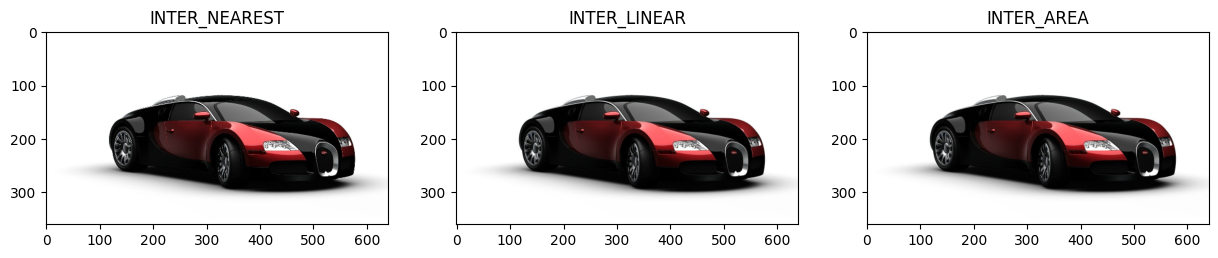

In [20]:
plt.figure(figsize=[15,15])
plt.subplot(131)
plt.title("INTER_NEAREST")
plt.imshow(res_inter_nearest[:,:,::-1])
plt.subplot(132)
plt.title("INTER_LINEAR")
plt.imshow(res_inter_linear[:,:,::-1])
plt.subplot(133)
plt.title("INTER_AREA")
plt.imshow(res_inter_area[:,:,::-1])